In [2]:
import pandas as pd
import os
import datetime

In [3]:
noticias_csv_path = '../noticias_combinadas.csv' # Ajusta esta ruta
df = pd.read_csv(noticias_csv_path)

In [4]:
df.head(5)

,title,body,date,url,source_title,source_dataType,source_uri,time,dateTime
0,Lula insta a celebrar democracia a 50 años del...,"El presidente brasileño, Luiz Inácio Lula da S...",2023-09-11,https://www.cronicadigital.cl/2023/09/11/lula-...,Crónica Digital,news,cronicadigital.cl,21:06:22,2023-09-11 21:06:22+00:00
1,Desaparecen las canas con estos 3 cortes de ca...,"Ingredientes como el té negro, el café, el rom...",2024-10-23,https://www.terra.cl/estilo-de-vida/2024/10/23...,Terra,news,terra.cl,13:08:56,2024-10-23 13:08:56+00:00
2,Probamos Masclub de Changomás: ¿Realmente sirv...,Probamos Masclub de Changomás: ¿Realmente sirv...,2024-10-23,https://america-retail.com/paises/argentina/pr...,América Retail,news,america-retail.com,12:38:41,2024-10-23 12:38:41+00:00
3,Proyección elecciones municipales y regionales...,La analista Javiera Delgadillo desglosa el esc...,2024-10-27,https://radionuevomundo.cl/2024/10/27/proyecci...,Radio Nuevo Mundo,news,radionuevomundo.cl,14:39:17,2024-10-27 14:39:17+00:00
4,Deportistas ancuditanas destacan en torneo de ...,Una notable participación tuvieron tres jóvene...,2024-08-01,https://elinsular.cl/noticias/chiloe/2024/08/0...,Periódico El Insular,news,elinsular.cl,15:04:08,2024-08-01 15:04:08+00:00


In [5]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['mes_año'] = df['date'].dt.to_period('M')


C:\Users\benja\AppData\Local\Temp\ipykernel_16256\2951234547.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


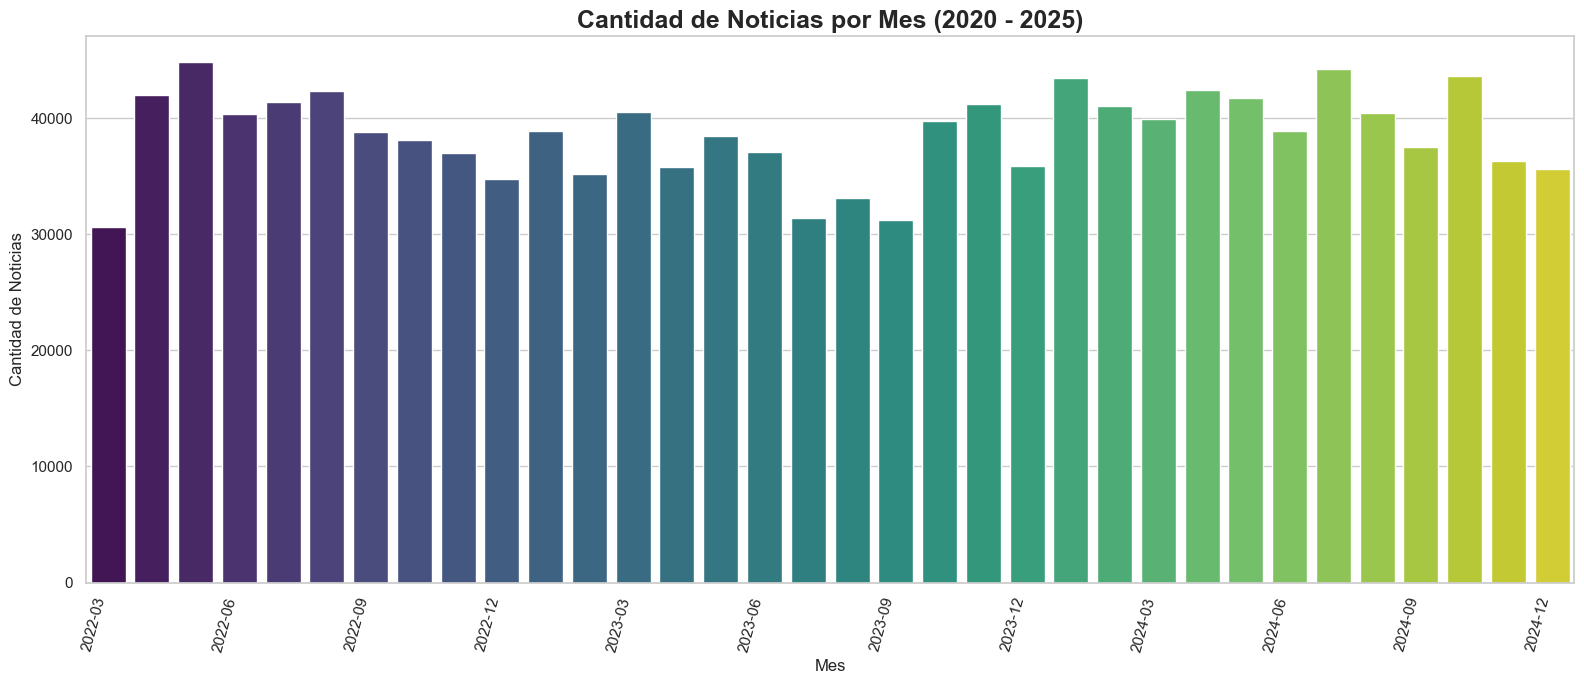

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

noticias_por_mes = df.groupby('mes_año').size().reset_index(name='cantidad_noticias')

noticias_por_mes['mes_año'] = noticias_por_mes['mes_año'].astype(str)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(16, 7)) 

ax = sns.barplot(
    x='mes_año',
    y='cantidad_noticias',
    data=noticias_por_mes,
    palette='viridis' 
)

plt.title('Cantidad de Noticias por Mes (2020 - 2025)', fontsize=18, weight='bold')
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Cantidad de Noticias', fontsize=12)

plt.xticks(rotation=75, ha='right')


for index, label in enumerate(ax.get_xticklabels()):
    if index % 3 != 0:
        label.set_visible(False)

plt.tight_layout()

plt.show()

# Plebiscito Nacional de 2020 (Apruebo/Rechazo): 25 de octubre de 2020


In [7]:
import pandas as pd
from datetime import datetime, timedelta


# Fecha del Plebiscito Constitucional de 2022
fecha_plebiscito_str = "2022-09-04"
fecha_plebiscito = datetime.strptime(fecha_plebiscito_str, "%Y-%m-%d")

# Calcular las fechas de inicio y fin del período de interés
fecha_inicio = fecha_plebiscito - timedelta(days=3*30) # Aproximadamente 3 meses (90 días)
fecha_fin = fecha_plebiscito + timedelta(days=3*30)   # Aproximadamente 2 meses (60 días)


año_inicio = fecha_plebiscito.year
mes_inicio = fecha_plebiscito.month - 3
dia_inicio = fecha_plebiscito.day

if mes_inicio <= 0:
    mes_inicio += 12
    año_inicio -= 1

# Manejar el caso de días en meses diferentes (ej: 31 de agosto - 3 meses -> 31 de mayo)
try:
    fecha_inicio_exacta = datetime(año_inicio, mes_inicio, dia_inicio)
except ValueError:
    # Si el día no existe en el mes (ej: 31 de abril), ir al último día del mes
    fecha_inicio_exacta = datetime(año_inicio, mes_inicio + 1, 1) - timedelta(days=1)


# 2 meses después: Sumar 2 meses al mes y año del plebiscito. Si el día es mayor, ajustarlo.
año_fin = fecha_plebiscito.year
mes_fin = fecha_plebiscito.month + 3
dia_fin = fecha_plebiscito.day

if mes_fin > 12:
    mes_fin -= 12
    año_fin += 1

try:
    fecha_fin_exacta = datetime(año_fin, mes_fin, dia_fin)
except ValueError:
    # Si el día no existe en el mes (ej: 31 de noviembre), ir al último día del mes
    fecha_fin_exacta = datetime(año_fin, mes_fin + 1, 1) - timedelta(days=1)


print(f"Fecha del Plebiscito: {fecha_plebiscito.strftime('%Y-%m-%d')}")
print(f"Inicio del período de análisis: {fecha_inicio_exacta.strftime('%Y-%m-%d')}")
print(f"Fin del período de análisis: {fecha_fin_exacta.strftime('%Y-%m-%d')}")

# --- 2. Simular un DataFrame de noticias (reemplaza esto con tu carga de datos real) ---
df_noticias = df.copy()
# Asegúrate de que la columna 'fecha' sea de tipo datetime
df_noticias['date'] = pd.to_datetime(df_noticias['date'])

# --- 3. Filtrar las noticias ---

# Filtrar por rango de fechas
df_filtrado_fechas = df_noticias[
    (df_noticias['date'] >= fecha_inicio_exacta) &
    (df_noticias['date'] <= fecha_fin_exacta)
]

len(df_filtrado_fechas)

Fecha del Plebiscito: 2022-09-04
Inicio del período de análisis: 2022-06-04
Fin del período de análisis: 2022-12-04


236248

In [10]:
keywords = [
    'plebiscito',
    'constitución',
    'proceso constituyente',
    'convención constitucional',
    'consejo constitucional',
    'nueva constitución']


search_pattern = '|'.join(keywords)


condicion_keywords = (
    df_filtrado_fechas['body'].str.contains(search_pattern, case=False, na=False) |
    df_filtrado_fechas['title'].str.contains(search_pattern, case=False, na=False)
)

df_filtrado_final = df_filtrado_fechas[condicion_keywords]
len(df_filtrado_final)

KeyboardInterrupt: 

C:\Users\benja\AppData\Local\Temp\ipykernel_29092\4125813530.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_final['semana'] = df_filtrado_final['date'].dt.to_period('W')
C:\Users\benja\AppData\Local\Temp\ipykernel_29092\4125813530.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='semana_str', y='cantidad_noticias', data=conteo_semanal, palette='viridis')


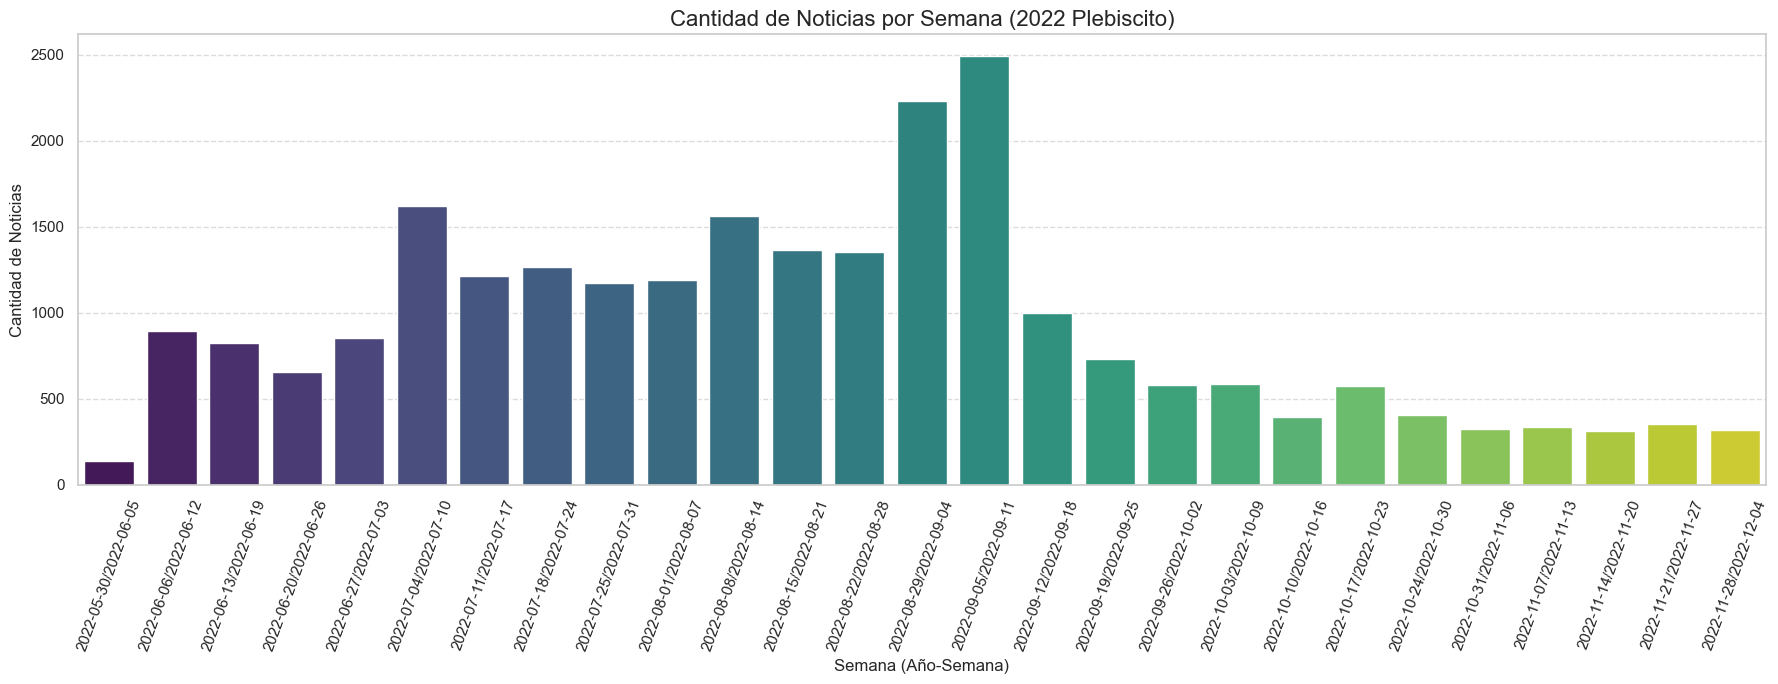

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

df_filtrado_final['semana'] = df_filtrado_final['date'].dt.to_period('W')

# 2. Contar noticias por semana
conteo_semanal = df_filtrado_final.groupby('semana').size().reset_index(name='cantidad_noticias')

# 3. Para una mejor visualización, puedes convertir el período a un string con la fecha de inicio de la semana
conteo_semanal['semana_str'] = conteo_semanal['semana'].astype(str)


# --- Opcional: Visualización con Seaborn/Matplotlib (como en tu gráfico original) ---
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 7))
sns.barplot(x='semana_str', y='cantidad_noticias', data=conteo_semanal, palette='viridis')
plt.title('Cantidad de Noticias por Semana (2022 Plebiscito)', fontsize=16)
plt.xlabel('Semana (Año-Semana)', fontsize=12)
plt.ylabel('Cantidad de Noticias', fontsize=12)
plt.xticks(rotation=70)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [11]:
def count_words(text):
    if pd.isna(text):
        return 0
    return len(str(text).split())

df_filtrado_final['cantidad_palabras'] = df_filtrado_final['body'].apply(count_words)

umbral_palabras = 3000
df_noticias_final_filtrado_por_longitud = df_filtrado_final[
    df_filtrado_final['cantidad_palabras'] < umbral_palabras].copy()

print(len(df_filtrado_final))
len(df_noticias_final_filtrado_por_longitud)

24762


C:\Users\benja\AppData\Local\Temp\ipykernel_16256\834539610.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_final['cantidad_palabras'] = df_filtrado_final['body'].apply(count_words)


24554

In [48]:
# Celda 2: Preparación de Prompt, Nodos Semilla y Prueba de Formato

import json 
import os   


df_filtrado = df_noticias_final_filtrado_por_longitud.copy()

# --- Función Auxiliar para Cargar Prompt ---
def load_prompt_from_file(filename: str) -> str:
    """Carga el prompt desde una ruta específica."""
    try:
        with open(filename, 'r', encoding='utf-8') as file:
            return file.read()
    except FileNotFoundError:
        print(f"Error CRÍTICO: El archivo de prompt '{filename}' no se encontró.")
        raise
    except Exception as e:
        print(f"Error CRÍTICO al leer el archivo de prompt '{filename}': {e}")
        raise

# --- Preparación del Prompt y Nodos Semilla ---
prompt_file_path = '../prompts/prompt.txt'
base_prompt_content = load_prompt_from_file(prompt_file_path)
final_system_prompt = base_prompt_content



# --- PRUEBA DE IMPRESIÓN (FORMATO PARA LA PRIMERA TAREA DEL BATCH) ---
print("\n--- INICIO PRUEBA DE FORMATO DE TAREA (usando la primera noticia de 'df_filtrado') ---")
primera_noticia_para_prueba = df_filtrado.iloc[0]
noticia_body_prueba = str(primera_noticia_para_prueba['body']) if pd.notna(primera_noticia_para_prueba['body']) else ""

print("\n===[ PROMPT DEL SISTEMA (System Role) ENVIADO A LA IA ]===")
print(final_system_prompt)
print("========================================================\n")

print("===[ CONTENIDO DEL USUARIO (User Role - primera noticia) ENVIADO A LA IA ]===")
# Imprime hasta 1000 caracteres de la noticia para la prueba, o todo si es más corto.
print(noticia_body_prueba[:1000] + ("..." if len(noticia_body_prueba) > 1000 else ""))
print("===========================================================================\n")

# Estructura completa de la primera tarea (ejemplo de cómo se vería en el batch)
primera_tarea_ejemplo_struct = {
    "custom_id": f"task-{primera_noticia_para_prueba.name}", # .name es el índice de la fila
    "method": "POST",
    "url": "/v1/chat/completions",
    "body": {
        "model": "gpt-4.1-mini", # Asegúrate que este es el modelo deseado
        "temperature": 0.1,
        "response_format": {"type": "json_object"},
        "messages": [
            {"role": "system", "content": final_system_prompt},
            {"role": "user", "content": noticia_body_prueba}
        ],
    }
}
print("===[ ESTRUCTURA JSON DE LA PRIMERA TAREA (EJEMPLO PARA EL ARCHIVO BATCH) ]===")
print(json.dumps(primera_tarea_ejemplo_struct, indent=2, ensure_ascii=False))
print("===============================================================================\n")
print("--- FIN PRUEBA DE FORMATO DE TAREA ---")
print("\nSi el formato y contenido son correctos, puedes proceder a ejecutar la Celda 3 para generar y enviar el batch.")

# Las variables `df_filtrado` y `final_system_prompt` están listas para ser usadas en la Celda 3.


--- INICIO PRUEBA DE FORMATO DE TAREA (usando la primera noticia de 'df_filtrado') ---

===[ PROMPT DEL SISTEMA (System Role) ENVIADO A LA IA ]===
**Role:** Expert political analyst & network scientist.

**Mission:** From the provided Chilean political news, extract the main power network as a single JSON object.

**Key Constraints:**
1.  **Focus on Importance:** Identify and extract only the **top 5 most significant power relationships (edges)** from the news. Do not exceed 5 edges.
2.  **Full Names Only:** Node labels MUST be the person's full name. **Strictly exclude any political or professional titles** (e.g., Presidente, Ministro, Diputada, Senador, Fiscal).

**Output Format:** A single JSON object: `{"nodes": [], "edges": []}`.

---

### **JSON Structure Definition**

**Nodes:** A list of dictionaries. Each node object must contain:
* `"id"`: A unique integer ID for this response, starting from 1.
* `"label"`: The individual's full name. **For example, if the text mentions "la 

In [50]:
# Celda 3: Generación de Tareas y Envío del Batch a OpenAI

import json
import io
import datetime
from openai import OpenAI # Re-importar o asegurarse de que el cliente esté disponible
from dotenv import load_dotenv

load_dotenv()



# --- Verificar si las variables necesarias existen (creadas en celdas anteriores) ---
if 'df_filtrado' not in globals() or df_filtrado.empty:
    print("Error CRÍTICO: DataFrame 'df_filtrado' no disponible o vacío. Ejecuta Celda 1 y Celda 2.")
    raise NameError("'df_filtrado' no disponible o vacío.")

if 'final_system_prompt' not in globals() or not final_system_prompt:
    print("Error CRÍTICO: 'final_system_prompt' no disponible. Ejecuta Celda 2.")
    raise NameError("'final_system_prompt' no disponible.")

# --- Inicializar cliente OpenAI (si no se hizo globalmente o si el kernel se reinició) ---
# Asumiendo que las variables de entorno ya fueron cargadas por load_dotenv() en Celda 1
try:
    client = OpenAI()
    print("Cliente OpenAI inicializado/confirmado.")
except Exception as e:
    print(f"Error CRÍTICO al inicializar el cliente de OpenAI: {e}")
    raise

# --- Generación de Tareas para el Batch ---
print("\nGenerando lista de tareas para el batch...")
batch_tasks_list = []
for index_original, row_data in df_filtrado.iterrows(): # `index_original` es el índice de df_filtrado
    noticia_description = str(row_data['body']) if pd.notna(row_data['body']) else ""
    
    # No es necesario volver a filtrar por descripción vacía aquí si df_filtrado ya lo hizo (word_count > 0)
    # pero una comprobación extra no hace daño si la lógica de filtrado cambia.
    if not noticia_description.strip(): 
        # print(f"Saltando índice {index_original} por descripción vacía (inesperado si df_filtrado es correcto).")
        continue

    task_item = {
        "custom_id": f"task-{index_original}", # Usa el índice original de la noticia
        "method": "POST",
        "url": "/v1/chat/completions",
        "body": {
            "model": "gpt-4.1-mini", # Asegúrate que este es el modelo deseado
            "temperature": 0.2,
            "response_format": {"type": "json_object"},
            "messages": [
                {"role": "system", "content": final_system_prompt},
                {"role": "user", "content": noticia_description}
            ],
        }
    }
    batch_tasks_list.append(task_item)

print(f"Número total de tareas generadas para el batch: {len(batch_tasks_list)}")

# --- Creación del Archivo Batch en Memoria y Envío ---
if not batch_tasks_list:
    print("No se generaron tareas. El batch no será enviado.")
else:
    # Confirmación antes de enviar (opcional, pero recomendado)
    user_confirmation_envio = input(f"Se han generado {len(batch_tasks_list)} tareas. ¿Deseas proceder con el envío del batch a OpenAI? (s/N): ")
    if user_confirmation_envio.lower() != 's':
        print("Envío del batch cancelado por el usuario.")
    else:
        print("\nProcediendo con la creación del archivo batch y envío a OpenAI...")
        jsonl_content_list_for_batch = [json.dumps(obj) for obj in batch_tasks_list]
        jsonl_content_str_for_batch = '\n'.join(jsonl_content_list_for_batch)

        batch_file_in_memory = io.BytesIO(jsonl_content_str_for_batch.encode('utf-8'))
        batch_file_in_memory.name = f"batch_input_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.jsonl"

        print(f"Creando archivo batch '{batch_file_in_memory.name}' en OpenAI...")
        try:
            openai_batch_file_object = client.files.create(
                file=batch_file_in_memory,
                purpose="batch"
            )
            print(f"Archivo batch creado en OpenAI con ID: {openai_batch_file_object.id}")

            print("Enviando job batch a OpenAI...")
            openai_batch_job_object = client.batches.create(
                input_file_id=openai_batch_file_object.id,
                endpoint="/v1/chat/completions",
                completion_window="24h" # Tiempo para que OpenAI complete el batch
            )
            print(f"Job batch enviado con ID: {openai_batch_job_object.id}")
            print("Puedes monitorear el estado del batch en el dashboard de OpenAI o usando la API.")
            print(f"Una vez completado, descarga el archivo de resultados JSONL (output).")
            print(f"Asegúrate de tener 'df_filtrado' (con {len(df_filtrado)} filas) disponible en memoria si Celda 4 lo necesita directamente.")

        except Exception as e:
            print(f"Error CRÍTICO durante la creación o envío del batch a OpenAI: {e}")
            # Considera `raise e` si el error debe detener todo flujo posterior

Cliente OpenAI inicializado/confirmado.

Generando lista de tareas para el batch...
Número total de tareas generadas para el batch: 24554

Procediendo con la creación del archivo batch y envío a OpenAI...
Creando archivo batch 'batch_input_20250614_234852.jsonl' en OpenAI...
Archivo batch creado en OpenAI con ID: file-4ptDKE7fNMsspB5SJhUR1G
Enviando job batch a OpenAI...
Job batch enviado con ID: batch_684e42c4c9788190a20dcd88af5d3a0a
Puedes monitorear el estado del batch en el dashboard de OpenAI o usando la API.
Una vez completado, descarga el archivo de resultados JSONL (output).
Asegúrate de tener 'df_filtrado' (con 24554 filas) disponible en memoria si Celda 4 lo necesita directamente.


# Parte 2

In [12]:
# Celda 2: Procesamiento de Resultados y Generación de Edgelist (Formato Modificado)

# --- Importaciones para Celda 2 ---
import pandas as pd
import json
from typing import List, Dict, Union, Optional # Para type hints

# --- Configuración ---
# !!! IMPORTANTE: ACTUALIZA ESTA RUTA al archivo de resultados .jsonl descargado de OpenAI !!!
jsonl_file_path = "json/plebiscito2022.jsonl" # Ejemplo de ruta

df_filtrado = df_noticias_final_filtrado_por_longitud.copy() # Asegúrate de que df_filtrado esté definido

# Nombre del archivo CSV de salida para el edgelist final
output_edgelist_csv_path = "output/edgelist_output_gpt4omini_5k_nuevo_formato_con_contenido.csv" # Nombre de archivo modificado

# Nombre de la columna en df_merged_with_results que contiene la fecha de la noticia
NOMBRE_COLUMNA_FECHA_NOTICIA = 'dateTime' # Ajusta si tu columna de fecha se llama diferente

# Nombres de las columnas para título y cuerpo de la noticia
# Asegúrate de que estas columnas existan en el DataFrame 'df' original (proveniente de df_filtrado)
NOMBRE_COLUMNA_TITULO_NOTICIA = 'title' # Asume que la columna se llama 'title'
NOMBRE_COLUMNA_CUERPO_NOTICIA = 'body'  # Asume que la columna se llama 'body'


# --- Funciones Auxiliares ---
def read_jsonl_results(file_path: str) -> List[Dict]:
    """Lee un archivo JSONL de resultados de batch y devuelve una lista de diccionarios."""
    json_objects = []
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            for line_number, line in enumerate(file, 1):
                line_stripped = line.strip()
                if line_stripped: # Asegurarse de que la línea no esté vacía
                    try:
                        json_objects.append(json.loads(line_stripped))
                    except json.JSONDecodeError as e:
                        print(f"Advertencia: Error decodificando JSON en línea {line_number} del archivo '{file_path}': {e}. Línea: '{line_stripped[:100]}...'")
    except FileNotFoundError:
        print(f"Error CRÍTICO: El archivo de resultados '{file_path}' no se encontró. Por favor, verifica la ruta.")
        raise
    except Exception as e:
        print(f"Error CRÍTICO al leer el archivo '{file_path}': {e}")
        raise
    return json_objects

def extract_network_edgelist_from_results_v2(
    df_with_results: pd.DataFrame,
    json_result_column: str,
    date_column_name: str,
    title_column_name: str, # <--- NUEVO PARÁMETRO
    body_column_name: str,  # <--- NUEVO PARÁMETRO
    node_type_attribute: str = 'type',
    default_node_type: str = 'UnknownNode'
) -> pd.DataFrame:
    """
    Extrae un edgelist con formato extendido desde una columna del DataFrame
    que contiene los resultados JSON de la IA, incluyendo título y cuerpo de la noticia.

    Output edgelist columns:
    FROM_NODE, TO_NODE, TYPE_FROM_NODE, TYPE_TO_NODE, SIGN, TYPE_SIGN, INDEX, DATE, TITLE, BODY
    """
    def parse_individual_json_result(data: Union[str, Dict, None]) -> Optional[Dict]:
        if data is None: return None
        if isinstance(data, dict): return data
        if not isinstance(data, str): return None
        try:
            return json.loads(data)
        except json.JSONDecodeError:
            return None

    all_relations = []
    processed_rows_count = 0
    rows_with_valid_parseable_json = 0
    rows_with_edges = 0

    for original_idx, row_data in df_with_results.iterrows():
        processed_rows_count += 1
        json_content_str = row_data.get(json_result_column)
        news_date = row_data.get(date_column_name)
        news_title = row_data.get(title_column_name) # <--- EXTRAER TÍTULO
        news_body = row_data.get(body_column_name)   # <--- EXTRAER CUERPO

        if pd.notna(news_date) and hasattr(news_date, 'strftime'):
            try:
                news_date_str = news_date.strftime('%Y-%m-%d')
            except AttributeError:
                 news_date_str = str(news_date) if pd.notna(news_date) else None
        else:
            news_date_str = str(news_date) if pd.notna(news_date) else None

        parsed_graph_data = parse_individual_json_result(json_content_str)

        if parsed_graph_data:
            rows_with_valid_parseable_json += 1
            nodes_list = parsed_graph_data.get('nodes', [])
            edges_list = parsed_graph_data.get('edges', [])

            if isinstance(nodes_list, list) and isinstance(edges_list, list) and nodes_list:
                id_to_label_map = {}
                id_to_type_map = {}

                for node in nodes_list:
                    if isinstance(node, dict) and 'id' in node and 'label' in node:
                        node_id_str = str(node['id'])
                        id_to_label_map[node_id_str] = node['label']
                        id_to_type_map[node_id_str] = node.get(node_type_attribute, default_node_type)

                current_row_edges = 0
                for edge in edges_list:
                    if not isinstance(edge, dict): continue

                    from_id_original = edge.get('from')
                    to_id_original = edge.get('to')

                    if from_id_original is None or to_id_original is None: continue

                    from_id_str = str(from_id_original)
                    to_id_str = str(to_id_original)

                    if from_id_str in id_to_label_map and to_id_str in id_to_label_map:
                        all_relations.append({
                            'FROM_NODE': id_to_label_map[from_id_str],
                            'TO_NODE': id_to_label_map[to_id_str],
                            'TYPE_FROM_NODE': id_to_type_map.get(from_id_str, default_node_type),
                            'TYPE_TO_NODE': id_to_type_map.get(to_id_str, default_node_type),
                            'SIGN': edge.get('sentiment', 'neutral'),
                            'TYPE_SIGN': edge.get('label', 'desconocido'),
                            'INDEX': original_idx, # Este es el índice de df_merged_with_results
                            'DATE': news_date_str,
                            'TITLE': news_title, # <--- AÑADIR TÍTULO A LA RELACIÓN
                            'BODY': news_body     # <--- AÑADIR CUERPO A LA RELACIÓN
                        })
                        current_row_edges += 1

                if current_row_edges > 0:
                    rows_with_edges += 1

    final_columns = ['FROM_NODE', 'TO_NODE', 'TYPE_FROM_NODE', 'TYPE_TO_NODE',
                     'SIGN', 'TYPE_SIGN', 'INDEX', 'DATE',
                     'TITLE', 'BODY'] # <--- ACTUALIZAR COLUMNAS FINALES

    edgelist_output_df = pd.DataFrame(all_relations, columns=final_columns) if all_relations \
                         else pd.DataFrame(columns=final_columns)

    total_input_rows = len(df_with_results)
    print(f"\n--- Estadísticas de Extracción de Edgelist (v2) ---")
    print(f"Total de filas de entrada (noticias con resultado): {total_input_rows}")

    ratio_parseable = (rows_with_valid_parseable_json / total_input_rows) if total_input_rows > 0 else 0.0
    print(f"Filas con contenido JSON parseable en '{json_result_column}': {rows_with_valid_parseable_json}/{total_input_rows} ({ratio_parseable:.2%})")

    ratio_edges = (rows_with_edges / total_input_rows) if total_input_rows > 0 else 0.0
    print(f"Filas que produjeron al menos una relación (edge): {rows_with_edges}/{total_input_rows} ({ratio_edges:.2%})")

    print(f"Total de relaciones (edges) extraídas: {len(edgelist_output_df)}")
    print(f"--- Fin Estadísticas ---")

    return edgelist_output_df

# --- Lógica Principal de la Celda 2 ---
print(f"Iniciando procesamiento de resultados del batch...")

# 1. Leer los resultados del archivo JSONL descargado de OpenAI
print(f"Cargando resultados desde: {jsonl_file_path}")
batch_output_json_lines = read_jsonl_results(jsonl_file_path)

if not batch_output_json_lines:
    print("No se cargaron datos del archivo JSONL de resultados o el archivo está vacío. Deteniendo procesamiento.")
else:
    print(f"Se cargaron {len(batch_output_json_lines)} líneas (respuestas) del archivo de resultados del batch.")

    # 2. Procesar las líneas JSON para crear un DataFrame de resultados (batch_results_df)
    parsed_results_list = []
    for item_index, result_item in enumerate(batch_output_json_lines):
        custom_id = result_item.get('custom_id')
        original_news_index = None

        if custom_id:
            try:
                original_news_index = int(custom_id.split('-')[-1])
            except (ValueError, IndexError, TypeError):
                print(f"Advertencia: No se pudo extraer el índice numérico del custom_id: '{custom_id}' en el item {item_index}.")

        actual_result_content = None
        if result_item.get('response') and isinstance(result_item['response'], dict) and \
           result_item['response'].get('body') and isinstance(result_item['response']['body'], dict) and \
           result_item['response']['body'].get('choices') and isinstance(result_item['response']['body']['choices'], list) and \
           len(result_item['response']['body']['choices']) > 0 and \
           isinstance(result_item['response']['body']['choices'][0], dict) and \
           result_item['response']['body']['choices'][0].get('message') and isinstance(result_item['response']['body']['choices'][0]['message'], dict):
            actual_result_content = result_item['response']['body']['choices'][0]['message'].get('content')
        elif result_item.get('error'):
             error_info = result_item['error']
             print(f"Advertencia: Error en la respuesta del batch para custom_id '{custom_id}': {error_info.get('message', str(error_info))}")

        if original_news_index is not None:
            parsed_results_list.append({
                'original_news_idx': original_news_index,
                'ia_result_json': actual_result_content,
            })

    if not parsed_results_list:
        print("CRÍTICO: No se pudieron procesar resultados válidos (con índice) desde las líneas JSON del batch. Deteniendo.")
    else:
        batch_results_df = pd.DataFrame(parsed_results_list)
        print(f"Creado batch_results_df con {len(batch_results_df)} filas (resultados de IA procesados).")

        try:
            # Asegúrate de que 'df' (o 'df_filtrado' de las celdas anteriores) esté disponible
            # y que contenga las columnas de fecha, título y cuerpo.
            # El 'df' aquí se refiere al DataFrame que contiene los datos originales de las noticias.
            # En tu flujo, este 'df' es el cargado en la Celda 1 (o df_filtrado si es el que se mantiene).
            if 'df' not in globals() or not isinstance(df, pd.DataFrame):
                 print("Error CRÍTICO: El DataFrame 'df' original (que contiene las fechas, títulos y cuerpos) no está disponible.")
                 print("Asegúrate de que la Celda 1 se haya ejecutado y que 'df' (o 'df_filtrado') esté en memoria.")
                 raise NameError("'df' original no definido o no es un DataFrame")

            # Verificar si las columnas de fecha, título y cuerpo existen en el DataFrame 'df'
            columnas_requeridas = {
                NOMBRE_COLUMNA_FECHA_NOTICIA: "fecha",
                NOMBRE_COLUMNA_TITULO_NOTICIA: "título",
                NOMBRE_COLUMNA_CUERPO_NOTICIA: "cuerpo"
            }
            for col_name, desc in columnas_requeridas.items():
                if col_name not in df.columns:
                    print(f"Error CRÍTICO: La columna de {desc} '{col_name}' no se encuentra en el DataFrame 'df'.")
                    print(f"Columnas disponibles en 'df': {df.columns.tolist()}")
                    raise KeyError(f"Columna de {desc} '{col_name}' no encontrada en df.")

            print(f"DataFrame 'df' original encontrado en memoria con {len(df)} filas y columnas: {df.columns.tolist()}.")

            df_merged_with_results = df.merge(
                batch_results_df,
                left_index=True, # Usa el índice de 'df' (que debe ser el 'df_filtrado' o su equivalente)
                right_on='original_news_idx',
                how='inner' # Asegura que solo se procesen noticias con resultados y viceversa
            )
            # 'original_news_idx' en df_merged_with_results es el índice original de 'df' antes del merge.
            # Esto es útil si se quiere referenciar de nuevo al 'df' original.
            # El 'INDEX' en el edgelist final será el índice de df_merged_with_results, que corresponde al índice de 'df'.

            print(f"df_merged_with_results creado con {len(df_merged_with_results)} filas después del merge.")

            if 'ia_result_json' not in df_merged_with_results.columns:
                 print("Error CRÍTICO: La columna 'ia_result_json' no está en df_merged_with_results.")
            elif df_merged_with_results['ia_result_json'].isna().all() and len(parsed_results_list) > 0 :
                 print("Advertencia: Todas las entradas en la columna 'ia_result_json' de df_merged_with_results son NaN.")

            if df_merged_with_results.empty:
                print("El DataFrame combinado está vacío. No se puede proceder a extraer el edgelist.")
            else:
                print("Extrayendo edgelist de los resultados combinados con el nuevo formato (incluyendo título y cuerpo)...")
                final_edgelist_df = extract_network_edgelist_from_results_v2(
                    df_merged_with_results,
                    'ia_result_json',
                    date_column_name=NOMBRE_COLUMNA_FECHA_NOTICIA,
                    title_column_name=NOMBRE_COLUMNA_TITULO_NOTICIA, # <--- PASAR NOMBRE DE COLUMNA DE TÍTULO
                    body_column_name=NOMBRE_COLUMNA_CUERPO_NOTICIA   # <--- PASAR NOMBRE DE COLUMNA DE CUERPO
                )

                if not final_edgelist_df.empty:
                    print(f"\nEdgelist final (nuevo formato con contenido) extraído con éxito, contiene {len(final_edgelist_df)} relaciones.")
                    print("Primeras 5 filas del edgelist_df final:")
                    print(final_edgelist_df.head())

                    try:
                        final_edgelist_df.to_csv(output_edgelist_csv_path, index=False)
                        print(f"\nEdgelist final (nuevo formato con contenido) guardado exitosamente en: {output_edgelist_csv_path}")
                    except Exception as e:
                        print(f"Error al guardar el edgelist CSV final: {e}")
                else:
                    print("\nEl edgelist final (nuevo formato con contenido) está vacío.")

        except (NameError, KeyError) as e_ref:
            print(f"Error de referencia o configuración: {e_ref}")
            print("No se pudo completar el procesamiento. Verifica que 'df' esté disponible y contenga las columnas requeridas (fecha, título, cuerpo).")
        except Exception as e_general:
            print(f"Ocurrió un error inesperado: {e_general}")
            import traceback
            traceback.print_exc()

Iniciando procesamiento de resultados del batch...
Cargando resultados desde: json/plebiscito2022.jsonl
Se cargaron 24554 líneas (respuestas) del archivo de resultados del batch.
Creado batch_results_df con 24554 filas (resultados de IA procesados).
DataFrame 'df' original encontrado en memoria con 1314578 filas y columnas: ['title', 'body', 'date', 'url', 'source_title', 'source_dataType', 'source_uri', 'time', 'dateTime', 'mes_año'].
df_merged_with_results creado con 24554 filas después del merge.
Extrayendo edgelist de los resultados combinados con el nuevo formato (incluyendo título y cuerpo)...

--- Estadísticas de Extracción de Edgelist (v2) ---
Total de filas de entrada (noticias con resultado): 24554
Filas con contenido JSON parseable en 'ia_result_json': 24553/24554 (100.00%)
Filas que produjeron al menos una relación (edge): 18146/24554 (73.90%)
Total de relaciones (edges) extraídas: 68056
--- Fin Estadísticas ---

Edgelist final (nuevo formato con contenido) extraído con éxi

In [13]:
df = pd.read_csv('output\edgelist_output_gpt4omini_5k_nuevo_formato_con_contenido.csv')

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
C:\Users\benja\AppData\Local\Temp\ipykernel_16256\3468456252.py:1: SyntaxWarning: invalid escape sequence '\e'
  df = pd.read_csv('output\edgelist_output_gpt4omini_5k_nuevo_formato_con_contenido.csv')


In [15]:
df

,FROM_NODE,TO_NODE,TYPE_FROM_NODE,TYPE_TO_NODE,SIGN,TYPE_SIGN,INDEX,DATE,TITLE,BODY
0,Verónica Contreras,Verónica Rincón,UnknownNode,UnknownNode,neutral,presented proposal to,0,2022-10-25 23:08:00+00:00,"Juan Pablo Swett, de la Multigremial de Empren...","Junto a Verónica Contreras, presidenta de la C..."
1,Verónica Contreras,Matías Walker,UnknownNode,UnknownNode,neutral,presented proposal to,0,2022-10-25 23:08:00+00:00,"Juan Pablo Swett, de la Multigremial de Empren...","Junto a Verónica Contreras, presidenta de la C..."
2,Swett,Verónica Rincón,UnknownNode,UnknownNode,neutral,shared constitutional expectations,0,2022-10-25 23:08:00+00:00,"Juan Pablo Swett, de la Multigremial de Empren...","Junto a Verónica Contreras, presidenta de la C..."
3,Swett,Matías Walker,UnknownNode,UnknownNode,neutral,shared constitutional expectations,0,2022-10-25 23:08:00+00:00,"Juan Pablo Swett, de la Multigremial de Empren...","Junto a Verónica Contreras, presidenta de la C..."
4,Verónica Contreras,Swett,UnknownNode,UnknownNode,positive,aligned on constitutional process,0,2022-10-25 23:08:00+00:00,"Juan Pablo Swett, de la Multigremial de Empren...","Junto a Verónica Contreras, presidenta de la C..."
...,...,...,...,...,...,...,...,...,...,...
68051,Francisco Muñoz,Ximena Ossandón,UnknownNode,UnknownNode,negative,intimidates parliamentary members,24552,2022-10-05 17:35:00+00:00,Cámara de Diputados aprueba condenar actos y e...,La Cámara de Diputados aprobó este miércoles e...
68052,Francisco Muñoz,Leonidas Romero,UnknownNode,UnknownNode,negative,intimidates parliamentary members,24552,2022-10-05 17:35:00+00:00,Cámara de Diputados aprueba condenar actos y e...,La Cámara de Diputados aprobó este miércoles e...
68053,Gonzalo de la Carrera,Francisco Muñoz,UnknownNode,UnknownNode,negative,votes against condemning violence,24552,2022-10-05 17:35:00+00:00,Cámara de Diputados aprueba condenar actos y e...,La Cámara de Diputados aprobó este miércoles e...
68054,Javier Macaya,Gabriel Boric,UnknownNode,UnknownNode,negative,criticizes for comments on Carabineros,24553,2022-10-19 13:02:00+00:00,Macaya emplaza al Presidente Boric a pedir dis...,"El presidente y senador de la UDI, Javier Maca..."


In [16]:
import pandas as pd


# Concatena las dos columnas en una sola Serie
all_nodes = pd.concat([df['FROM_NODE'], df['TO_NODE']])

# Cuenta la frecuencia de cada nodo y obtén los 20 principales
top_20_nodes = all_nodes.value_counts().head(20)

# Imprime el resultado
print(top_20_nodes)

Gabriel Boric            15114
Ximena Rincón             2068
Giorgio Jackson           2050
Camila Vallejo            1918
Raúl Soto                 1597
Matías Walker             1570
Álvaro Elizalde           1350
Izkia Siches              1326
Karol Cariola             1260
Javier Macaya             1219
Ricardo Lagos             1217
Sebastián Piñera          1190
Michelle Bachelet         1066
Mario Marcel              1051
Carolina Tohá             1028
Francisco Chahuán          961
Guillermo Teillier         874
Paulina Vodanovic          803
José Antonio Kast          770
María Elisa Quinteros      717
Name: count, dtype: int64
